In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as SklearnGridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [4]:
train_df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv')
test_df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/test.csv')

In [5]:
print(train_df.shape)
print(test_df.shape)

(7352, 563)
(2947, 563)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
train_df.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
train_df.duplicated().sum()

0

<Axes: xlabel='count', ylabel='Activity'>

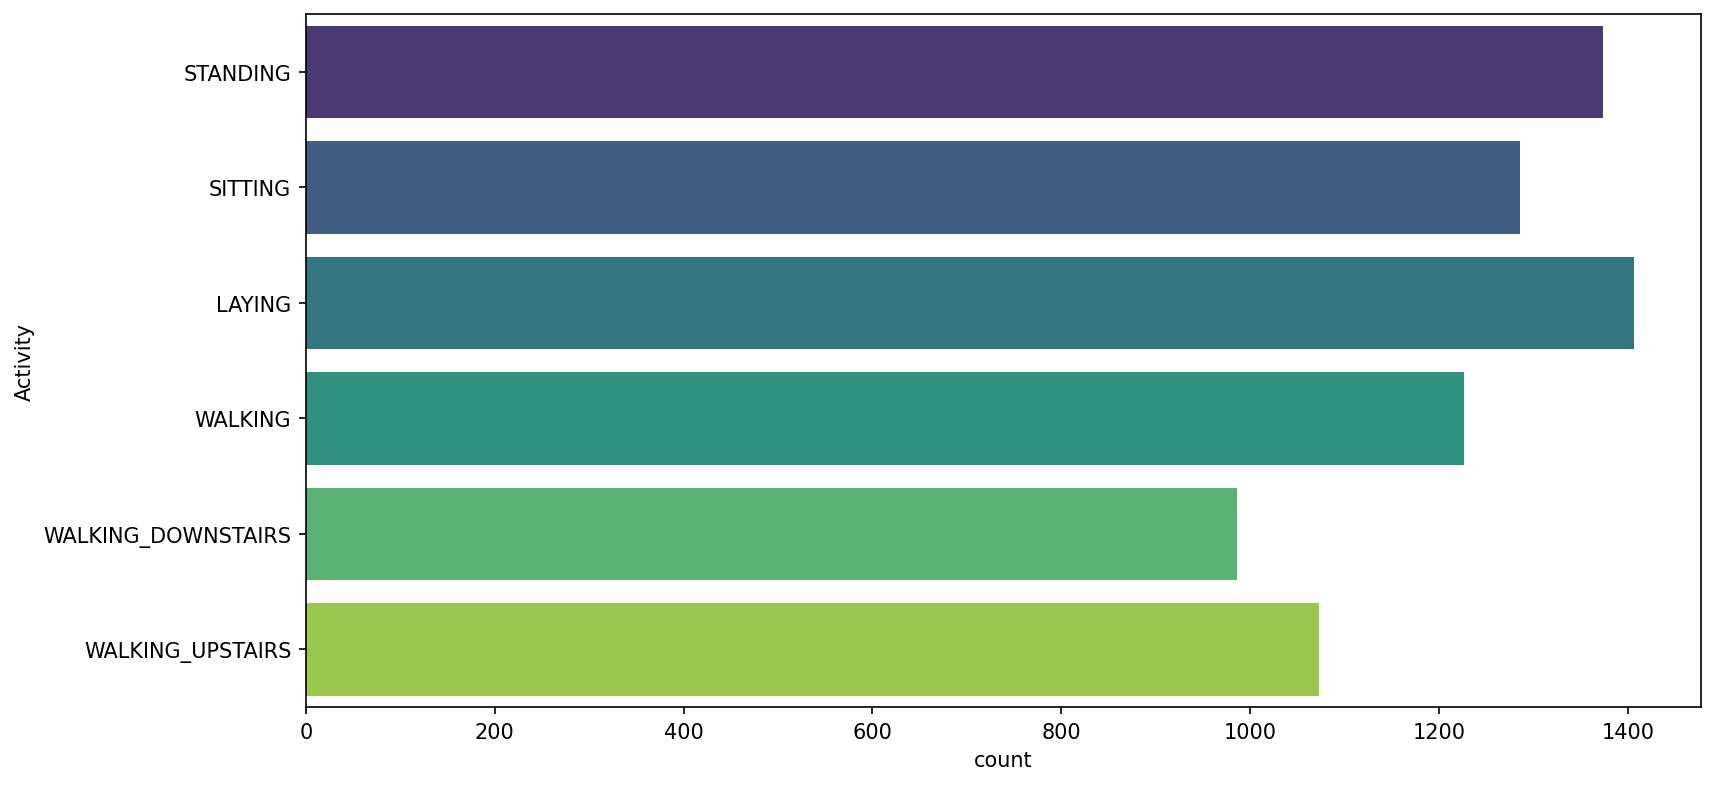

In [10]:
plt.figure(figsize=(12,6),dpi=150)
sns.countplot(data=train_df,y='Activity',palette='viridis')

In [11]:
train_df.Activity.value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [12]:
# encoding data
# [1, 2, 3, 4, 5, 6]
train_df['Activity'] = train_df['Activity'].map({'WALKING':1,'WALKING_UPSTAIRS':2,
                                          'WALKING_DOWNSTAIRS':3,'SITTING':4,'STANDING':5,'LAYING':6})

test_df['Activity'] = test_df['Activity'].map({'WALKING':1,'WALKING_UPSTAIRS':2,
                                          'WALKING_DOWNSTAIRS':3,'SITTING':4,'STANDING':5,'LAYING':6})



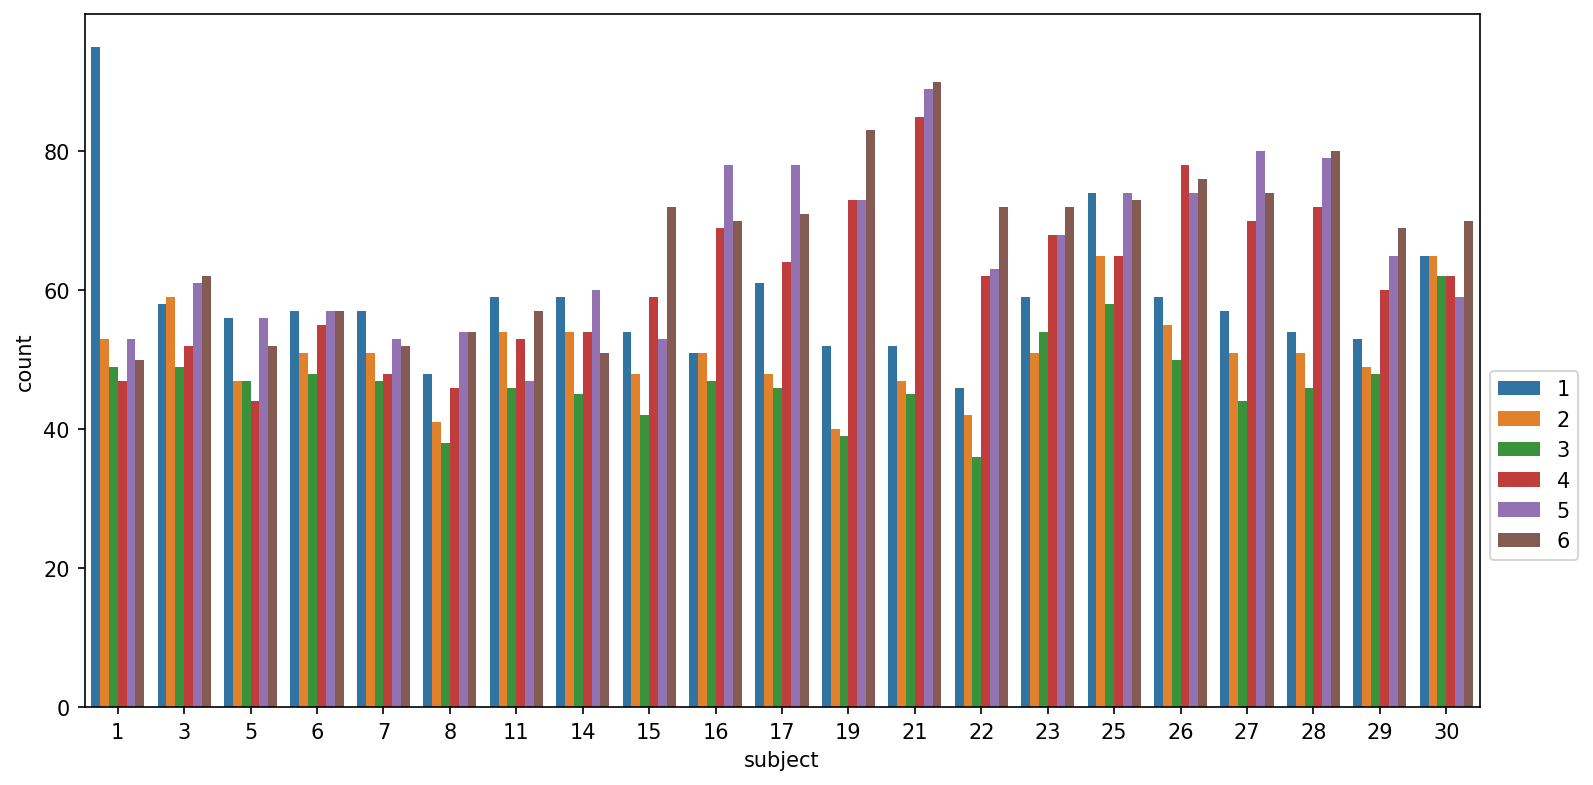

In [13]:
plt.figure(figsize=(12,6),dpi=150)
sns.countplot(data=train_df,x='subject',hue='Activity')
plt.legend(bbox_to_anchor=(1,0.5))

In [14]:
columns = train_df.columns
columns = columns.str.replace('()','').str.replace("(","").str.replace(")","")
columns = columns.str.replace('-','')
columns = columns.str.replace(',','')
train_df.columns= columns
test_df.columns= columns



In [15]:
corr_matrix = train_df.corr()
corr_matrix

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
tBodyAccmeanX,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181,-0.001508
tBodyAccmeanY,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144,0.035346
tBodyAccmeanZ,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637,0.038644
tBodyAccstdX,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345,-0.721896
tBodyAccstdY,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524,-0.816971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
angleXgravityMean,-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137,0.612318
angleYgravityMean,0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829,-0.632656
angleZgravityMean,0.028242,-0.013903,-0.022643,0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,...,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712,-0.538593
subject,0.024181,-0.003144,-0.000637,-0.064345,-0.115524,-0.050123,-0.063440,-0.114753,-0.055457,-0.055633,...,-0.043902,-0.005087,0.012510,-0.005314,0.009340,0.026137,-0.009829,-0.098712,1.000000,0.057717


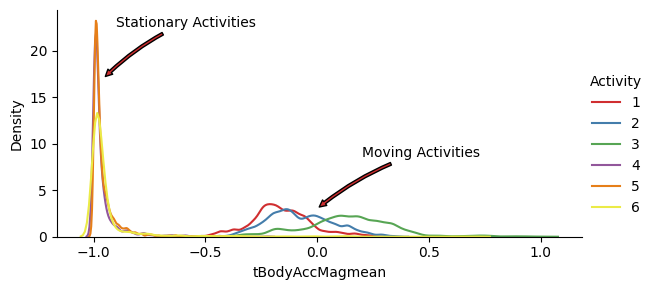

In [16]:
# seprating feature and target variables
# plt.figure(figsize=(12,6),dpi=200)
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_df,hue='Activity',aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMagmean', bw_adjust=0.5).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=10,
             va="center", ha="left",
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Annotating Moving Activities
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=10,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.show()

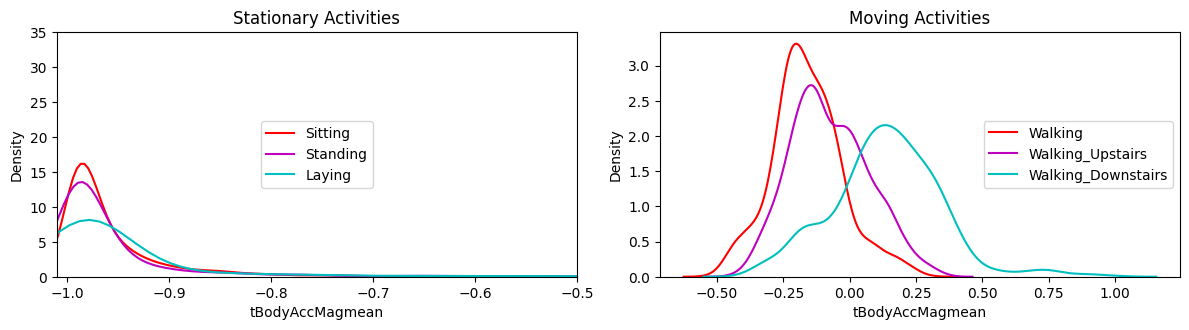

In [17]:
# static activites :-  sitting, standing, and laying 
# dynamic activites : -  walking, walking downstairs, and walking upstairs)

walk_df = train_df[train_df['Activity']==1]
walk_up = train_df[train_df['Activity']==2]
walk_down = train_df[train_df['Activity']==3]
stand_df = train_df[train_df['Activity']==4]
sit_df = train_df[train_df['Activity']==5]
lay_df = train_df[train_df['Activity']==6]



plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

plt.title('Stationary Activities')
sns.distplot(sit_df['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(stand_df['tBodyAccMagmean'],color = 'm',hist = False, label = 'Standing')
sns.distplot(lay_df['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')

plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')
plt.subplot(2,2,2)
plt.title('Moving Activities')

sns.distplot(walk_df['tBodyAccMagmean'],color = 'r',hist = False, label = 'Walking')
sns.distplot(walk_up['tBodyAccMagmean'],color = 'm',hist = False, label = 'Walking_Upstairs')
sns.distplot(walk_down['tBodyAccMagmean'],color = 'c',hist = False, label = 'Walking_Downstairs')


plt.legend(loc='center right')
plt.tight_layout()
plt.show()

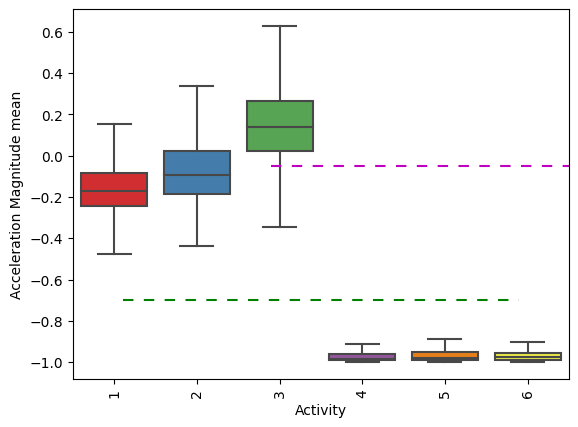

In [18]:
sns.boxplot(data=train_df,x='Activity',y='tBodyAccMagmean',showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

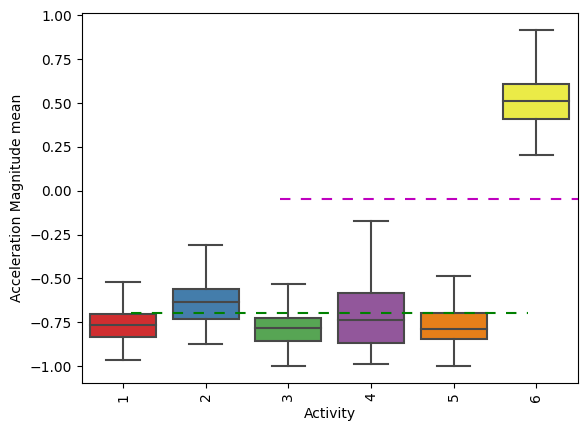

In [19]:
sns.boxplot(data=train_df,x='Activity',y='angleXgravityMean',showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

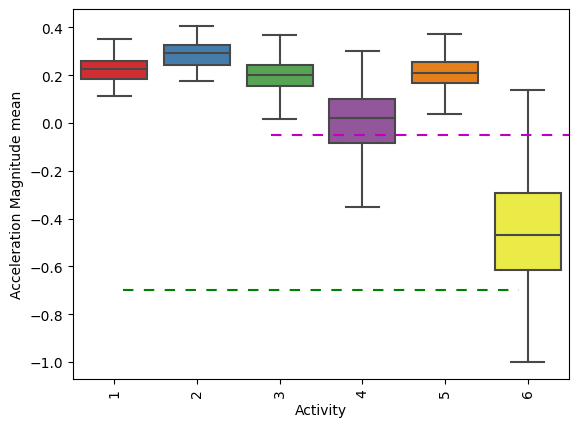

In [20]:
sns.boxplot(data=train_df,x='Activity',y='angleYgravityMean',showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Applying some models
train_X = train_df.drop('Activity',axis=1)
train_y = train_df['Activity']

test_X = test_df.drop('Activity',axis=1)
test_y = test_df['Activity']

In [22]:
# base model

svc_clf = SVC()
svc_clf.fit(train_X,train_y)
print(f"Training Accuracy Score : {svc_clf.score(train_X,train_y)}")

Training Accuracy Score : 0.9581066376496191


In [23]:
y_pred = svc_clf.predict(test_X)
print(f"Testing Accuracy Score: {accuracy_score(test_y,y_pred)}")

Testing Accuracy Score: 0.9307770614183916


In [24]:
class CustomGridSearchCV:
    def __init__(self, models, param_grids, scoring='accuracy', cv=5):
        self.models = models
        self.param_grids = param_grids
        self.scoring = scoring
        self.cv = cv
        self.results = {}

    def fit(self, X, y):
        for model_name in self.models:
            model = self.models[model_name]
            param_grid = self.param_grids[model_name]
            grid_search = SklearnGridSearchCV(estimator=model, param_grid=param_grid, 
                                              scoring=self.scoring, cv=self.cv, n_jobs=-1, verbose=1)
            grid_search.fit(X, y)

            self.results[model_name] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'best_estimator': grid_search.best_estimator_,
                'cv_results': grid_search.cv_results_
            }

    def get_best_params(self, model_name):
        return self.results[model_name]['best_params']

    def get_best_score(self, model_name):
        return self.results[model_name]['best_score']

    def get_best_estimator(self, model_name):
        return self.results[model_name]['best_estimator']

    def get_cv_results(self, model_name):
        return self.results[model_name]['cv_results']

# Define models
models = {
    'svc_clf': SVC(),
    'rf': RandomForestClassifier(),
    'dt': DecisionTreeClassifier(),
    'lr': LogisticRegression(max_iter=1000) 
}

# Define parameter grids
param_grids = {
    
    'svc_clf': {
    'kernel':['linear','rbf','sigmoid'],
    'C':[0.1,0.5,1,2,5,10,100]
    },
    
    'rf': {
        'n_estimators': [10, 30, 60, 90, 120, 150],
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8]  # Removed 0 as max_depth cannot be 0
    },
    'dt': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8]  
    },
    'lr': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 0.5, 1, 2, 5, 10, 100],
        'solver':['liblinear']
    }
}


grid_search_cv = CustomGridSearchCV(models=models, param_grids=param_grids, scoring='accuracy', cv=5)
X,y = train_X,train_y
grid_search_cv.fit(X, y)

print("Best parameters for SVC :", grid_search_cv.get_best_params('svc_clf'))
print("Best score for SVC :", grid_search_cv.get_best_score('svc_clf'))
print("Best parameters for RandomForest:", grid_search_cv.get_best_params('rf'))
print("Best score for RandomForest:", grid_search_cv.get_best_score('rf'))
print("Best parameters for DecisionTree:", grid_search_cv.get_best_params('dt'))
print("Best score for DecisionTree:", grid_search_cv.get_best_score('dt'))
print("Best parameters for LogisticRegression:", grid_search_cv.get_best_params('lr'))
print("Best score for LogisticRegression:", grid_search_cv.get_best_score('lr'))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters for SVC : {'C': 1, 'kernel': 'linear'}
Best score for SVC : 0.9360805042615279
Best parameters for RandomForest: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 90}
Best score for RandomForest: 0.9227473559104131
Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 6}
Best score for DecisionTree: 0.8643902754847691
Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.9408390793434981


In [25]:
svm_best_model = SVC(C=1,kernel='linear')
svm_best_model.fit(train_X,train_y)
y_pred = svm_best_model.predict(test_X)
print("Training Accuracy Score: ",svm_best_model.score(train_X,train_y))
print('Testing Accuracy Score: ',accuracy_score(y_pred,test_y))

Training Accuracy Score:  0.9940152339499456
Testing Accuracy Score:  0.9633525619273838


In [26]:
print("Classification report")
print(classification_report(y_pred,test_y))
print("\n")
print("Confusion Matrix")
cm = confusion_matrix(y_pred,test_y,labels= svm_best_model.classes_)
fig = px.imshow(cm,text_auto=True,color_continuous_scale=['#002379','#40A578','#088395','#1679AB','#3572EF','#005C78'])
fig.show()

Classification report
              precision    recall  f1-score   support

           1       1.00      0.95      0.97       520
           2       0.95      0.98      0.97       455
           3       0.98      0.99      0.98       413
           4       0.89      0.96      0.92       451
           5       0.97      0.90      0.94       571
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.97      0.96      2947
weighted avg       0.96      0.96      0.96      2947



Confusion Matrix


In [27]:
rf_best_model = RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=8)
rf_best_model.fit(train_X,train_y)
rf_y_pred = rf_best_model.predict(test_X)
print(f"RandomForestClassifier Training Score: {rf_best_model.score(train_X,train_y)}")
print(f"RandomForestClassifier Testing Score: {accuracy_score(test_y,rf_y_pred)}")

RandomForestClassifier Training Score: 0.9880304678998912
RandomForestClassifier Testing Score: 0.9141499830335935


In [28]:
print("RandomForest Classification report :")
print(classification_report(test_y,rf_y_pred))

print("\n")
print("RandomForest Confusion matrix")
cm = confusion_matrix(test_y,rf_y_pred,labels=rf_best_model.classes_)
fig = px.imshow(cm,text_auto=True,color_continuous_scale=['#002379','#40A578','#088395','#1679AB','#3572EF','#005C78'])
fig.show()

RandomForest Classification report :
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       496
           2       0.88      0.90      0.89       471
           3       0.96      0.82      0.88       420
           4       0.92      0.86      0.88       491
           5       0.87      0.93      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



RandomForest Confusion matrix


In [29]:
lr_best_model = LogisticRegression(C=2,penalty='l1',solver='liblinear')
lr_best_model.fit(train_X,train_y)
lr_y_pred = lr_best_model.predict(test_X)
print("LogisticRegression Training Score : ",lr_best_model.score(train_X,train_y))
print(f"LogisticRegression Testing Score: {accuracy_score(test_y,lr_y_pred)}")

LogisticRegression Training Score :  0.9937431991294886
LogisticRegression Testing Score: 0.9613165931455717


In [30]:
print("Logistic Regression report :")
print(classification_report(test_y,lr_y_pred))

print("\n")
print("Logistic Regression Confusion matrix")
cm = confusion_matrix(test_y,lr_y_pred,labels=lr_best_model.classes_)
print(cm)
fig = px.imshow(cm,text_auto=True,color_continuous_scale=['#002379','#40A578','#088395','#1679AB','#3572EF','#005C78'])
fig.show()

Logistic Regression report :
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.96      0.97       471
           3       1.00      0.97      0.99       420
           4       0.98      0.86      0.91       491
           5       0.89      0.98      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



Logistic Regression Confusion matrix
[[495   0   1   0   0   0]
 [ 21 450   0   0   0   0]
 [  4   7 409   0   0   0]
 [  0   4   0 421  66   0]
 [  2   0   0   9 521   0]
 [  0   0   0   0   0 537]]
